In [6]:
#pip install -U textblob
#python -m textblob.download_corpora
import nltk
!pip install stylecloud
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

     |████████████████████████████████| 262 kB 7.4 MB/s 
     |████████████████████████████████| 161 kB 53.4 MB/s 
     |████████████████████████████████| 87 kB 7.4 MB/s 
     |████████████████████████████████| 87 kB 7.8 MB/s 
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259508 sha256=f110d084392cb3f4dc98aeaf82361bf8c73d0ef5cce1f13995dced2335043993
  Stored in directory: /root/.cache/pip/wheels/77/42/7a/f52b5f84c04196fd4c2a3dceeb1bbeaee1c93a4fe271b5eb41
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115943 sha256=0e6bfad569d3ec536b97867943aa4069d03e90341f6f0730bbc9c99b70b58fbd
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
  Created wheel for tinycss: filename=tinycss-0.4-py3-none-any.whl size=43955 sha256=42a8501cdb883d00f9d304b44705a541e23c76e304c339a182edec2de49c87b1
  Stored in directory: /root/.cache/pip/wheels/6c/66/e8/e53d7a476011891fa51a5ee83a2d1852b19b258f975

True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#pip install textblob
import pandas as pd
import numpy as np
import matplotlib
import cufflinks as cf
from PIL import Image
from textblob import TextBlob
import plotly
import re
import stylecloud
import unicodedata
import plotly.offline as py
import plotly.graph_objs as go
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
cf.go_offline() # required to use plotly offline (no account required).
py.init_notebook_mode() # graphs charts inline (IPython).

Output hidden; open in https://colab.research.google.com to view.

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Classroom/G11 - Módulo I/Data/visualizaciones/reviews_ropa.csv')

In [9]:
df=df.drop(columns=["Unnamed: 0"])
df.columns=["id","c_age","v_title","t_review","v_rating","v_recomended_ind","c_positive_fb_count","v_division_name","v_department_name","v_class_name"]

In [10]:
df=df[df["t_review"].notnull()]

In [11]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText
df['t_review'] = preprocess(df['t_review'])

### POLARIDAD

In [12]:
df['c_polarity'] = df['t_review'].map(lambda text: TextBlob(text).sentiment.polarity)
df['c_review_len'] = df['t_review'].astype(str).apply(len)
df['c_word_count'] = df['t_review'].apply(lambda x: len(str(x).split()))

In [13]:
cl = df.loc[df.c_polarity == 1, ['t_review']].sample(5).values
for c in cl:
    print(c[0])
    print("\n")

Fits perfect!


Beautiful dress! the pics online do not do any justice! i got compliments all day!


Absolutely gorgeous!
words can't describe the beauty of this dress!
i hope they will restock it cause i would order size s (didn't know how it runs).


Bought this dress for an indian wedding- it was perfect!


This is so flowing and perfect to hide any flaws.i adore it!




In [14]:
cl = df.loc[df.c_polarity == 0, ['t_review']].sample(5).values
for c in cl:
    print(c[0])
    print("\n")

When i received the dress i went to try it on and one of the loops for the string to cinch the dress broke. guess that's gonna have to go back


Tried this on in store. was ill-fitting and sheer.


Like the extra details on the neck and back - and it's versatile to wear everywhere


Can be a bit itchy sometimes, i guess depending on your skin. haven't had a problem with the sweater up to now!


Poor quality. i expected much more from the material.




In [15]:
cl = df.loc[df.c_polarity == df["c_polarity"].min(), ['t_review']].values
for c in cl:
    print(c[0])
    print("\n")

Cut out design, no seems or hems.
 very disappointed in retailer


Received this product with a gaping hole in it. very disappointed in the quality and the quality control at the warehouse




In [16]:
df[["c_polarity"]].describe()

,c_polarity
count,22641.000000
mean,0.249824
std,0.176679
min,-0.975000
25%,0.140000
50%,0.239399
75%,0.350000
max,1.000000


In [31]:
import datetime
from datetime import date
import pandas as pd
import numpy as np
from plotly import __version__
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 


cf.go_offline()
init_notebook_mode(connected=False)

Output hidden; open in https://colab.research.google.com to view.

In [32]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [34]:
#La gran mayoría de los puntajes de polaridad de sentimiento son mayores que cero, siendo estos muy positivos
configure_plotly_browser_state()
df['c_polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    linecolor='black',
    yTitle='count',
    title='Distribucion de la polaridad de sentimientos')


### RATING

In [ ]:
#Las calificaciones están alineadas con la puntuación de polaridad, es decir, 
#la mayoría de las calificaciones son bastante altas en 4 o 5 rangos.
df['v_rating'].iplot(
    kind='hist',
    xTitle='rating',
    linecolor='black',
    yTitle='count',
    title='Distribución del rating')

### EDAD

In [ ]:
#La mayoría de los críticos tienen entre 30 y 40 años.
df['c_age'].iplot(
    kind='hist',
    bins=50,
    xTitle='age',
    linecolor='black',
    yTitle='count',
    title='Distribución de la edad')

### LONGITUD DEL TEXTO


In [ ]:
df['c_review_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='review length',
    linecolor='black',
    yTitle='count',
    title='Distribucion de la longitud del texto')

In [ ]:
#Existe un gran número de personas a las que les gusta dejar reseñas largas.
df['c_word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='word count',
    linecolor='black',
    yTitle='count',
    title='Review Text Word Count Distribution')

### PALABRAS MAS FRECUENTES

In [ ]:
from nltk.corpus import stopwords
from nltk import FreqDist

In [ ]:
corpus=" ".join(df["t_review"].values)

In [ ]:
fdist=FreqDist(corpus.split())

In [ ]:
freq=pd.DataFrame(fdist.most_common(30))
freq.columns=["palabra","frecuencia"]
freq=freq.set_index("palabra")

In [ ]:
freq.iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 30 palabras más comunes antes de eliminar stopwords')


In [ ]:
lista_stopwords = stopwords.words("english")
hapaxes=fdist.hapaxes()

In [ ]:
def remove_stopwords_hapaxes(x,stopwords,hapaxes):
    texto_limpio=" ".join(list(filter(lambda x:x not in stopwords,x.split())))
    texto_limpio=" ".join(list(filter(lambda x:x not in hapaxes,texto_limpio.split())))
    return texto_limpio

In [ ]:
df["t_review_clean"]=df["t_review"].map(lambda x:remove_stopwords_hapaxes(x,lista_stopwords,hapaxes))

In [ ]:
corpus=" ".join(df["t_review_clean"].values)
fdist=FreqDist(corpus.split())

In [ ]:
fdist

FreqDist({'I': 8756, 'dress': 7773, 'love': 7370, 'size': 6780, 'like': 6683, 'wear': 5899, 'fit': 5863, "i'm": 5082, 'top': 5014, 'would': 4973, ...})

In [ ]:
freq=pd.DataFrame(fdist.most_common(30))
freq.columns=["palabra","frecuencia"]
freq=freq.set_index("palabra")

In [ ]:
freq.iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 30 palabras más comunes despues de eliminar stopwords')


### BIGRAMAS

In [ ]:
def top_n_grams(corpus, n_grams,n=None):
    vec = CountVectorizer(ngram_range=(n_grams, n_grams)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    data=pd.DataFrame(words_freq[:n])
    data.columns=["palabra","frecuencia"]
    return data

In [ ]:
top_n_grams(df["t_review"], 2,n=30).set_index("palabra").iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Distribución de los principales bigramas antes de eliminar stopwords')

In [ ]:
top_n_grams(df["t_review_clean"], 2,n=30).set_index("palabra").iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Distribución de los principales bigramas despues de eliminar stopwords')

### TRIGRAMAS

In [ ]:
top_n_grams(df["t_review"], 3,n=30).set_index("palabra").iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Distribución de los principales trigramas antes de eliminar stopwords')

In [ ]:
top_n_grams(df["t_review_clean"], 3,n=30).set_index("palabra").iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Distribución de los principales trigramas despues de eliminar stopwords')

### PARTES DEL DISCURSO

- CC conjunción coordinadora
- Dígito cardinal de CD
- Determinante de DT
- EX existencial allí (como: "hay" ... piense en ello como "existe")
- FW palabra extranjera
- IN preposición / conjunción subordinante
- JJ adjetivo 'grande'
- JJR adjetivo, comparativo 'más grande'
- JJS adjetivo, superlativo 'mayor'
- Marcador de lista LS 1)
- MD modal podría, lo hará
- NN sustantivo, singular 'escritorio'
- NNS sustantivo plural 'escritorios'
- NNP nombre propio, singular 'Harrison'
- NNPS nombre propio, plural 'Americans'
- PDT predeterminado 'todos los niños'
- POS posesivo final de los padres
- PRP pronombre personal yo, él, ella
- PRP  pronombre posesivo my, his, hers
- RB adverbio muy, silenciosamente,
- Adverbio RBR, comparativo mejor
- Adverbio RBS, superlativo mejor
- Partícula RP se rinde
- TO para ir 'a' la tienda.
- UH interjección errrrrrrrm
- Verbo VB, forma base tomar
- Verbo VBD, tiempo pasado tomado
- Verbo VBG,  gerundio / participio presente tomando
- Verbo VBN, participio pasado tomado
- Verbo VBP, cantar. presente, toma no 3d
- Verbo VBZ, cantar en tercera persona. presente toma
- WDT wh-determiner que
- WP wh-pronombre quién, qué
- WP $ pronombre-wh posesivo cuyo
- WRB wh-abverbio donde, cuando

In [ ]:
# Ejemplo
blob=TextBlob("Everything is all about money.")
blob.tags

#preposicion
#determinante
#verbo
#sustantivo

[('Everything', 'NN'),
 ('is', 'VBZ'),
 ('all', 'DT'),
 ('about', 'IN'),
 ('money', 'NN')]

In [ ]:
blob = TextBlob(str(df['t_review_clean']))

In [ ]:
blob.tags

[('0', 'CD'),
 ('Absolutely', 'RB'),
 ('wonderful', 'JJ'),
 ('silky', 'NN'),
 ('sexy', 'NN'),
 ('comfortable', 'JJ'),
 ('1', 'CD'),
 ('Love', 'NNP'),
 ('dress', 'NN'),
 ('sooo', 'NN'),
 ('pretty', 'NN'),
 ('happened', 'VBN'),
 ('find', 'NNS'),
 ('store', 'NN'),
 ('2', 'CD'),
 ('I', 'PRP'),
 ('high', 'VBP'),
 ('hopes', 'NNS'),
 ('dress', 'VBP'),
 ('really', 'RB'),
 ('wanted', 'JJ'),
 ('work', 'NN'),
 ('me', 'PRP'),
 ('init', 'NN'),
 ('3', 'CD'),
 ('I', 'PRP'),
 ('love', 'VBP'),
 ('love', 'VBP'),
 ('love', 'VBP'),
 ('jumpsuit', 'NN'),
 ('fun', 'NN'),
 ('flirty', 'NN'),
 ('fabu', 'NN'),
 ('4', 'CD'),
 ('This', 'DT'),
 ('shirt', 'NN'),
 ('flattering', 'VBG'),
 ('due', 'JJ'),
 ('adjustable', 'JJ'),
 ('front', 'NN'),
 ('tie', 'NN'),
 ('23481', 'CD'),
 ('I', 'PRP'),
 ('happy', 'JJ'),
 ('snag', 'NN'),
 ('dress', 'NN'),
 ('great', 'JJ'),
 ('price', 'NN'),
 ('easy', 'JJ'),
 ('slip', 'NN'),
 ('flat', 'JJ'),
 ('23482', 'CD'),
 ('It', 'PRP'),
 ('reminds', 'VBZ'),
 ('maternity', 'NN'),
 ('clothes', 

In [ ]:
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.iplot(
    kind='bar',
    xTitle='POS',
    yTitle='count', 
    title='Top 20 partes del discurso')
## NN - Sustantivo 

### NUBES DE PALABRAS

In [ ]:
def text_clean(text, pattern="[^a-zA-Z0-9 ]"):
    text_clean = unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    text_clean= re.sub(pattern, " ", text_clean.decode("utf-8"), flags=re.UNICODE)
    text_clean = u' '.join(text_clean.lower().split())
    return text_clean

In [ ]:
df["t_review_clean"]=df["t_review_clean"].map(text_clean)

In [ ]:
path_text="../data/visualizaciones/wordcloud_review.txt"
path_image="../data/visualizaciones/wordcloud_review.png"

In [ ]:
corpus=" ".join(df["t_review_clean"].values)

In [ ]:
with open(path_texto,"w") as f:
        f.write(corpus)

#### GENERAL

In [ ]:
def wordcloud(corpus,path_text,path_image,palette="cartocolors.diverging.Temps_7",icon_name="fas fa-adjust"):
    with open(path_text,"w") as f:
        f.write(corpus)
    stylecloud.gen_stylecloud(file_path = path_text,output_name=path_image,palette=palette,icon_name=icon_name)
    return Image.open(path_imagen)

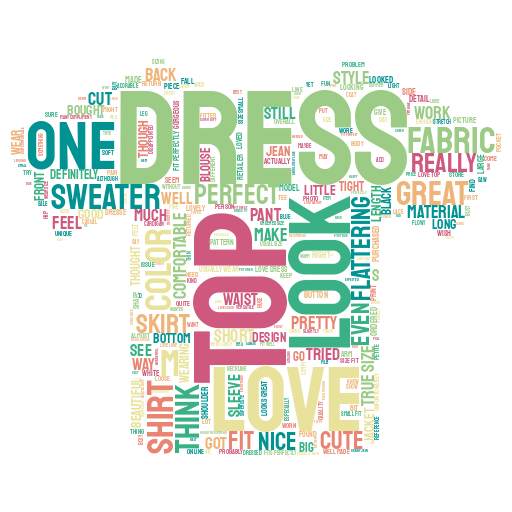

In [ ]:
wordcloud(corpus,path_text,path_image,icon_name="fas fa-tshirt")

#### POSITIVO

In [ ]:
df["c_polarity"].describe()

count    22641.000000
mean         0.249824
std          0.176679
min         -0.975000
25%          0.140000
50%          0.239399
75%          0.350000
max          1.000000
Name: c_polarity, dtype: float64

In [ ]:
corpus=" ".join(df[.2<df["c_polarity"]]["t_review_clean"].values)

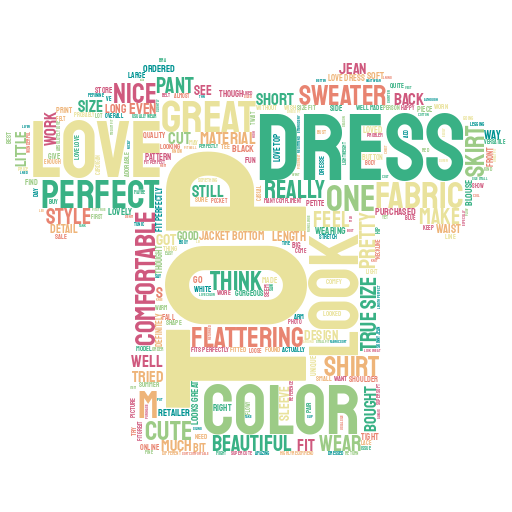

In [ ]:
wordcloud(corpus,path_text,path_image,icon_name="fas fa-tshirt")

#### NEUTRO

In [ ]:
corpus=" ".join(df[(-.2<df["c_polarity"])&(df["c_polarity"]<=.2)]["t_review_clean"].values)

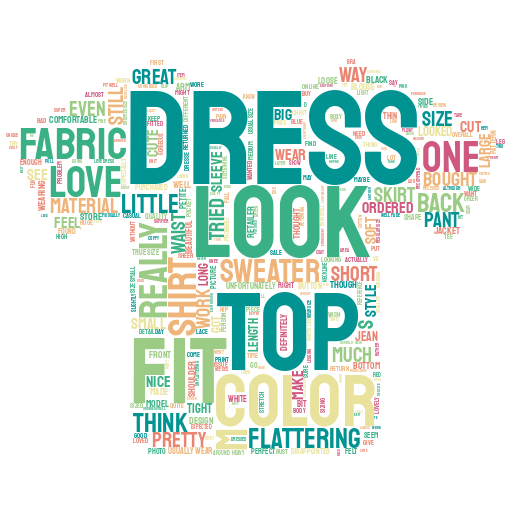

In [ ]:
wordcloud(corpus,path_text,path_image,icon_name="fas fa-tshirt")

#### NEGATIVO

In [ ]:
corpus=" ".join(df[(df["c_polarity"]<=-.2)]["t_review_clean"].values)

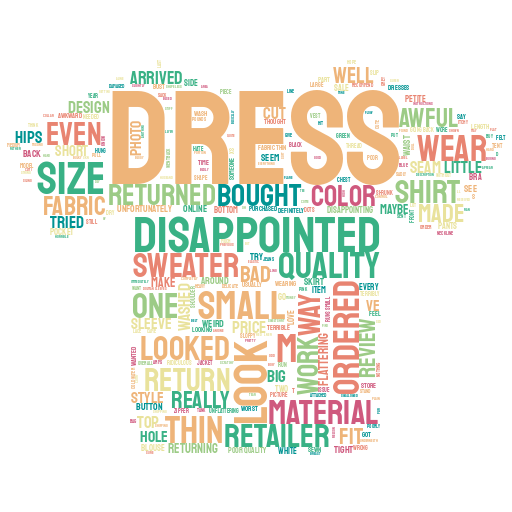

In [ ]:
wordcloud(corpus,path_text,path_image,icon_name="fas fa-tshirt")